In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/Height-Weight Data.csv")

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [7]:
df.Height.head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [26]:
df['Height'].head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [9]:
df[5:6]

,Height,Weight
5,67.253016,152.212156


In [10]:
df[5:10]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [11]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [12]:
df.Height.mean()

69.02441087268781

In [13]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [14]:
df.Weight.std()

19.903131631122328

In [15]:
df.shape

(3501, 2)

In [16]:
row, col = df.shape

In [17]:
row

3501

In [18]:
col

2

In [19]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [20]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# **Vizualisation**

Text(0.5, 1.0, 'Weight plot')

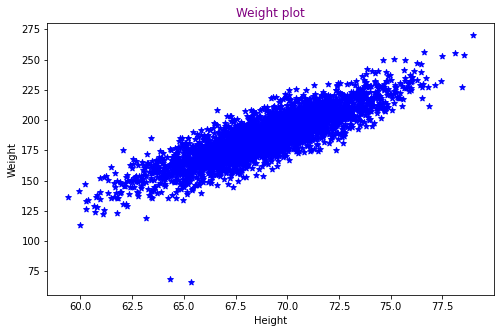

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(df.Height , df.Weight, marker='*' , color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight plot', color='purple')

In [29]:
x = df[['Height']]
y = df['Weight']

In [30]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


## **Split dataset into train and test**

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [31]:
xtrain.head()

,Height
2228,64.821171
2526,66.307071
2884,70.254261
2513,64.872571
1916,73.608365


In [32]:
ytrain.head()

2228    166.776838
2526    162.506037
2884    176.048644
2513    162.310278
1916    220.033778
Name: Weight, dtype: float64

# Linear **Regression**

In [33]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [44]:
m = reg.coef_
m

array([6.03535758])

In [45]:
c = reg.intercept_
c

-229.61200057548498

In [64]:
x1 = 73.847017
y = m * x1 + c

In [65]:
y

array([216.08115348])

In [66]:
reg.predict([[73.847017]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([216.08115348])

In [60]:
pred = reg.predict(xtest)

In [61]:
pred

array([157.52131453, 174.79606741, 186.16851439, ..., 155.81531219,
       199.83215881, 200.11547612])

In [62]:
df['predicted_result'] = reg.predict(x)

In [63]:
df

,Height,Weight,predicted_result
0,73.847017,241.893563,216.081154
1,68.781904,162.310473,185.511386
2,74.110105,212.740856,217.668986
3,71.730978,220.042470,203.310104
4,69.881796,206.349801,192.149626
...,...,...,...
3496,69.296830,185.649086,188.619148
3497,70.542201,210.198845,196.135410
3498,73.912549,202.429960,216.476663
3499,67.396021,144.277671,177.147085


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
mse = mean_squared_error(ytest, pred)

In [68]:
mse

96.02303394197592

In [71]:
mae = mean_absolute_error(ytest, pred)

In [72]:
mae

7.870384469958407

# Best fit **line**

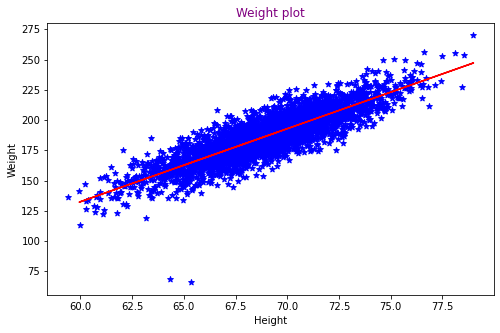

In [80]:
plt.figure(figsize=(8,5))
plt.scatter(df.Height , df.Weight, marker='*' , color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight plot', color='purple')
plt.plot(xtrain, reg.predict(xtrain), color='red')

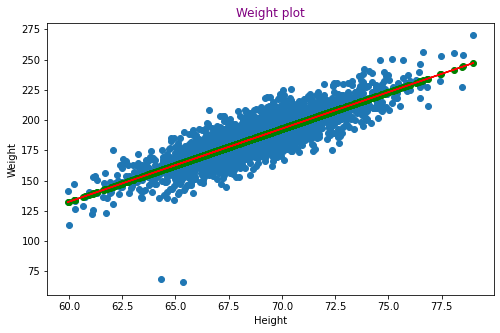

In [82]:
plt.figure(figsize=(8,5))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight plot', color='purple')
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='green')


In [87]:
reg.predict([[65.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([162.68624234])

In [88]:
reg.score(xtest, ytest)

0.7485149850269213

In [90]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7485149850269213